# Combined liquid property dataset

In [1]:
from openff.evaluator.datasets.thermoml import ThermoMLDataSet
from openff.evaluator.client import RequestOptions
from openff.evaluator import unit
from openff.evaluator.properties import (Density,
                                         EnthalpyOfVaporization,
                                         ExcessMolarVolume,
                                         DielectricConstant,
                                         EnthalpyOfMixing)
import pandas as pd

## Filenames

In [29]:
import os

BIBFILE = "data/00_physprop-benchmark-sources.bib"
RAW_JSON = "data/01_raw_thermoml_dataset_from_sources.json"
RAW_CSV = "data/01_raw_thermoml_dataset_from_sources.csv"
ENTRY_DIRNAME = "data/01_raw_data_entries"
ESTIMATED_DIRNAME = "data/02_raw_data_estimated_{tk}_{method}"
WORKING = "working/{tk}_{method}_working-data"
STORED = "working/{tk}_{method}_stored-data"

## Parlsey benchmark set

### Constants

In [30]:
SMILES_TEST_SET = [
    'CC#N',
    'c1ccc(cc1)Cl',
    'c1ccsc1',
    'C(=O)O',
    'C(Cl)(Cl)Cl',
    'c1cc(cc(c1)Cl)Cl',
    'c1cc(cc(c1)Br)Br',
    'CCI',
    'C1CCNCC1',
    'CCOC(OCC)OCC',
    'c1ccc(cc1)F',
    'C(Br)Br',
    'C(Cl)Br',
    'CCOC(=O)CC(=O)C',
    'CC(=O)CCC(=O)O',
    'C(C(C(F)(F)F)(F)F)O',
    'COc1cccc(c1)Br',
    'C=CC#N',
    'CNCCCN',
    'CCn1ccnc1',
    'CCCI',
    'CCCCCCCCCCCCS',
    'COc1ccccc1O',
    'c1cc(cc(c1)I)F',
    'c1cc(ccc1F)I',
    'c1ccc2c(c1)ncs2',
    'Cc1ccc2c(c1)OCO2',
    'c1ccc(cc1)SCN=[N+]=[N-]',
    'c1cscc1C#N',
    'c1cc(sc1)C#N'
]


### Data

The DOIs are in `data/physprop-benchmark-sources.bib`.

In [31]:
import re

def read_dois_from_bib(bibfile=BIBFILE):
    with open(bibfile, "r") as f:
        contents = f.read()
    dois = re.findall("doi[\s]*=[\s]*\{([a-zA-Z0-9./]+)\}", contents)
    return dois

I read the DOIs with [a modified version of evaluator that skipped un-parseable molecules](https://github.com/openforcefield/openff-evaluator/issues/364), so I will save and load to/from JSON to avoid doing this again.

I also assign a pressure of 1 atm to `EnthalpyOfVaporization` objects where no pressure was recorded, as was done originally: https://github.com/openforcefield/nistdataselection/blob/fce2bcdab38a92b5192441dc2c2dfb992cb46980/nistdataselection/curatedataset.py#L1030-L1040

In [33]:
# # uncomment this block to re-download the information
# dois = read_dois_from_bib()
# dataset = ThermoMLDataSet.from_doi(*dois)
# # manually set enthalpy of vaporization pressures to 1 atm
# # https://github.com/openforcefield/nistdataselection/blob/fce2bcdab38a92b5192441dc2c2dfb992cb46980/nistdataselection/curatedataset.py#L1030-L1040
# for prop in dataset:
#     if isinstance(prop, EnthalpyOfVaporization):
#         prop.thermodynamic_state.pressure = 1 * unit.atmosphere
# dataset.json(RAW_JSON)

dataset = ThermoMLDataSet.from_json(RAW_JSON)

Write out to CSV.

In [ ]:
df = dataset.to_pandas()
df.to_csv(RAW_CSV)

In [105]:
df.head()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,...,EnthalpyOfVaporization Uncertainty (kJ / mol),DielectricConstant Value (),DielectricConstant Uncertainty (),EnthalpyOfMixing Value (kJ / mol),EnthalpyOfMixing Uncertainty (kJ / mol),Density Value (g / ml),Density Uncertainty (g / ml),ExcessMolarVolume Value (cm ** 3 / mol),ExcessMolarVolume Uncertainty (cm ** 3 / mol),Source
0,cdedb582124741a3afaa875c9f4baaf2,298.15,101.325,Liquid + Gas,1,CC(=O)OCC=C(C)C,Solvent,1.0,None,NaN,...,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jct.2015.02.015
1,549bb2b4a1e14223ae6e1914acffdfa2,298.15,101.325,Liquid + Gas,1,C/C=C/C=C/COC(C)=O,Solvent,1.0,None,NaN,...,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jct.2015.02.015
2,d50bda070748490caaea9c5048ba112f,298.15,101.325,Liquid + Gas,1,CC/C=C\CCOC(=O)CC,Solvent,1.0,None,NaN,...,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jct.2015.02.015
3,d72f100eaece4e2b8f725afd4ef11deb,298.15,101.325,Liquid + Gas,1,C=CCOC(=O)CCCCC,Solvent,1.0,None,NaN,...,1.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jct.2015.02.015
4,4d8d2bb089a1458abae59bd56aa84960,298.15,101.325,Liquid + Gas,1,CCCCCOC(=O)CCC,Solvent,1.0,None,NaN,...,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jct.2015.02.015


In [103]:
len(df)

16925

Write out separate entries to CSV to allow parallel jobs....

In [104]:
import os

for i in range(len(df)):
    filename = ENTRY_NAME.format(i+1)
    df.iloc[i:i+1].to_csv(filename)

### Estimation

I used the scripts in `01_estimate_single_property.py` and `01_estimate_single_property*.sh` to run estimates, with customized OpenFF Toolkit code that checked for environmental variables for toggling AM1BCC and AM1BCCELF10.

### Analysis

In [4]:
from openff.evaluator.datasets import PhysicalPropertyDataSet

In [34]:
def combined_estimated_dataset(toolkit="oe", charge_method="am1bcc"):
    import glob
    import os
    
    directory = ESTIMATED_DIRNAME.format(tk=toolkit, method=charge_method)
    search_path = os.path.join(directory, "*.json")
    json_files = glob.glob(search_path)
    
    combined = PhysicalPropertyDataSet()
    
    for jfile in json_files:
        combined.merge(PhysicalPropertyDataSet.from_json(jfile))
    
    combined.json(f"estimated_{toolkit}_{charge_method}.json")
    return combined

def construct_combined_dataframes():
    import re
    dfs = []
    tkname = {"oe": "OpenEye", "at": "AmberTools"}
    for tk in ["oe", "at"]:
        for method in ["am1bcc", "am1bccelf10"]:
            ds = combined_estimated_dataset(toolkit=tk, charge_method=method)
            dct = {"Id": [], "Property": [],
                   "Value": [], "Unit": [],
                   "Uncertainty": [],
                   "Phase": [],}
            for prop in ds:
                dct["Id"].append(prop.id)
                propname = re.split("(?=[A-Z][a-z]*)", type(prop).__name__)
                dct["Property"].append(" ".join(propname[1:]))
                dct["Value"].append(prop.value.magnitude)
                dct["Unit"].append(str(prop.value.units))
                dct["Uncertainty"].append(prop.uncertainty.to(prop.value.units).magnitude)
                dct["Phase"].append(str(prop.phase))
            df = pd.DataFrame(dct)
            df["Toolkit"] = tkname[tk]
            df["Charge method"] = method
            dfs.append(df)
    df = pd.concat(dfs)

    return df
                

In [35]:
import re

re.split("(?=[A-Z][a-z]*)", "EnthalpyOfVaporization")

['', 'Enthalpy', 'Of', 'Vaporization']

In [36]:
oe_am1bcc = combined_estimated_dataset()

In [37]:
oe_am1bcc.to_pandas()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,...,Exact Amount 2,ExcessMolarVolume Value (cm ** 3 / mol),ExcessMolarVolume Uncertainty (cm ** 3 / mol),EnthalpyOfMixing Value (kJ / mol),EnthalpyOfMixing Uncertainty (kJ / mol),Density Value (g / ml),Density Uncertainty (g / ml),EnthalpyOfVaporization Value (kJ / mol),EnthalpyOfVaporization Uncertainty (kJ / mol),Source
0,dc0815534a3b40a7ae800e36ebb9cb95,303.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.1839,None,Cc1ccncc1,...,NaN,NaN,NaN,NaN,NaN,0.958230,0.000238,NaN,NaN,SimulationLayer
1,0c2a94c7b31a40bb91afe7f757511bc1,303.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.5778,None,Cc1cccnc1,...,NaN,NaN,NaN,NaN,NaN,0.985228,0.000384,NaN,NaN,SimulationLayer
2,fe28a3ead9be439493c6d51b967f53a9,308.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.5256,None,Cc1ccncc1,...,NaN,NaN,NaN,NaN,NaN,0.978444,0.000278,NaN,NaN,SimulationLayer
3,e718135aa50e43f6907ccf7ce0389915,298.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.5146,None,Cc1ccccn1,...,NaN,NaN,NaN,NaN,NaN,0.986822,0.000273,NaN,NaN,SimulationLayer
4,cfa01d22de3046eca222128bd4afa258,298.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.4133,None,Cc1ccncc1,...,NaN,-0.322074,0.018313,NaN,NaN,NaN,NaN,NaN,NaN,SimulationLayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,9cd7607d64414cb8a73eb48dd4c132c8,298.15,101.325,Liquid + Gas,1,CC/C=C\CCOC(=O)CCC,Solvent,1.0000,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.467084,0.311009,SimulationLayer
243,53012a89e2364ccc885c4278a7467a48,308.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.3539,None,Cc1ccncc1,...,NaN,NaN,NaN,NaN,NaN,0.966047,0.000234,NaN,NaN,SimulationLayer
244,83c324435ba042af83af606cfdcad326,298.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.3629,None,Cc1ccccn1,...,NaN,-0.494719,0.017772,NaN,NaN,NaN,NaN,NaN,NaN,SimulationLayer
245,b92ace3595404aa196a17e03691c1255,298.15,101.000,Liquid,2,Cc1ccccc1N,Solvent,0.2328,None,Cc1ccncc1,...,NaN,NaN,NaN,NaN,NaN,0.967112,0.000265,NaN,NaN,SimulationLayer


In [38]:
comb = construct_combined_dataframes()

In [39]:
comb

,Id,Property,Value,Unit,Uncertainty,Phase,Toolkit,Charge method
0,dc0815534a3b40a7ae800e36ebb9cb95,Density,9.582299e-01,g / ml,2.381608e-04,Liquid,OpenEye,am1bcc
1,0c2a94c7b31a40bb91afe7f757511bc1,Density,9.852282e-01,g / ml,3.843268e-04,Liquid,OpenEye,am1bcc
2,fe28a3ead9be439493c6d51b967f53a9,Density,9.784435e-01,g / ml,2.778429e-04,Liquid,OpenEye,am1bcc
3,e718135aa50e43f6907ccf7ce0389915,Density,9.868222e-01,g / ml,2.726124e-04,Liquid,OpenEye,am1bcc
4,cfa01d22de3046eca222128bd4afa258,Excess Molar Volume,-3.220743e+20,nm ** 3 / mol,1.831265e+19,Liquid,OpenEye,am1bcc
...,...,...,...,...,...,...,...,...
85,5c1fe6a2c5f14980954dde0944dbb5f2,Density,9.725037e-01,g / ml,2.840766e-04,Liquid,AmberTools,am1bcc
86,655431ce34024ef0908e719eb477bc8d,Density,9.968584e-01,g / ml,3.563288e-04,Liquid,AmberTools,am1bcc
87,637bcba9d79c48c89062a00a681eff61,Density,1.003385e+00,g / ml,2.623339e-04,Liquid,AmberTools,am1bcc
88,47c9a63620764def8aad33fb7b895dc2,Excess Molar Volume,-4.177147e+20,nm ** 3 / mol,1.890243e+19,Liquid,AmberTools,am1bcc


In [40]:
values = []
uncertainties = []
sources = []

properties_by_id = {p.id: p for p in dataset}

for row in comb.itertuples():
    prop = properties_by_id[row.Id]
    values.append(prop.value.to(row.Unit).magnitude)
    uncertainties.append(prop.uncertainty.to(row.Unit).magnitude)
    sources.append(prop.source.doi)
    
    
comb["Experimental value"] = values
comb["Experimental uncertainty"] = uncertainties
comb["Source"] = sources

comb

,Id,Property,Value,Unit,Uncertainty,Phase,Toolkit,Charge method,Experimental value,Experimental uncertainty,Source
0,dc0815534a3b40a7ae800e36ebb9cb95,Density,9.582299e-01,g / ml,2.381608e-04,Liquid,OpenEye,am1bcc,9.572640e-01,1.205000e-04,10.1016/j.jct.2010.12.028
1,0c2a94c7b31a40bb91afe7f757511bc1,Density,9.852282e-01,g / ml,3.843268e-04,Liquid,OpenEye,am1bcc,9.769310e-01,1.185000e-04,10.1016/j.jct.2010.12.028
2,fe28a3ead9be439493c6d51b967f53a9,Density,9.784435e-01,g / ml,2.778429e-04,Liquid,OpenEye,am1bcc,9.696110e-01,1.190000e-04,10.1016/j.jct.2010.12.028
3,e718135aa50e43f6907ccf7ce0389915,Density,9.868222e-01,g / ml,2.726124e-04,Liquid,OpenEye,am1bcc,9.748990e-01,2.315000e-04,10.1016/j.jct.2010.12.028
4,cfa01d22de3046eca222128bd4afa258,Excess Molar Volume,-3.220743e+20,nm ** 3 / mol,1.831265e+19,Liquid,OpenEye,am1bcc,-4.159000e+20,4.350000e+18,10.1016/j.jct.2010.12.028
...,...,...,...,...,...,...,...,...,...,...,...
85,5c1fe6a2c5f14980954dde0944dbb5f2,Density,9.725037e-01,g / ml,2.840766e-04,Liquid,AmberTools,am1bcc,9.640250e-01,2.405000e-04,10.1016/j.jct.2010.12.028
86,655431ce34024ef0908e719eb477bc8d,Density,9.968584e-01,g / ml,3.563288e-04,Liquid,AmberTools,am1bcc,9.826210e-01,1.865000e-04,10.1016/j.jct.2010.12.028
87,637bcba9d79c48c89062a00a681eff61,Density,1.003385e+00,g / ml,2.623339e-04,Liquid,AmberTools,am1bcc,9.856110e-01,1.425000e-04,10.1016/j.jct.2010.12.028
88,47c9a63620764def8aad33fb7b895dc2,Excess Molar Volume,-4.177147e+20,nm ** 3 / mol,1.890243e+19,Liquid,AmberTools,am1bcc,-5.563000e+20,4.550000e+18,10.1016/j.jct.2010.12.028


#### Estimated vs Experimental

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
comb

,Id,Property,Value,Unit,Uncertainty,Phase,Toolkit,Charge method,Experimental value,Experimental uncertainty,Source
0,dc0815534a3b40a7ae800e36ebb9cb95,Density,9.582299e-01,g / ml,2.381608e-04,Liquid,OpenEye,am1bcc,9.572640e-01,1.205000e-04,10.1016/j.jct.2010.12.028
1,0c2a94c7b31a40bb91afe7f757511bc1,Density,9.852282e-01,g / ml,3.843268e-04,Liquid,OpenEye,am1bcc,9.769310e-01,1.185000e-04,10.1016/j.jct.2010.12.028
2,fe28a3ead9be439493c6d51b967f53a9,Density,9.784435e-01,g / ml,2.778429e-04,Liquid,OpenEye,am1bcc,9.696110e-01,1.190000e-04,10.1016/j.jct.2010.12.028
3,e718135aa50e43f6907ccf7ce0389915,Density,9.868222e-01,g / ml,2.726124e-04,Liquid,OpenEye,am1bcc,9.748990e-01,2.315000e-04,10.1016/j.jct.2010.12.028
4,cfa01d22de3046eca222128bd4afa258,Excess Molar Volume,-3.220743e+20,nm ** 3 / mol,1.831265e+19,Liquid,OpenEye,am1bcc,-4.159000e+20,4.350000e+18,10.1016/j.jct.2010.12.028
...,...,...,...,...,...,...,...,...,...,...,...
85,5c1fe6a2c5f14980954dde0944dbb5f2,Density,9.725037e-01,g / ml,2.840766e-04,Liquid,AmberTools,am1bcc,9.640250e-01,2.405000e-04,10.1016/j.jct.2010.12.028
86,655431ce34024ef0908e719eb477bc8d,Density,9.968584e-01,g / ml,3.563288e-04,Liquid,AmberTools,am1bcc,9.826210e-01,1.865000e-04,10.1016/j.jct.2010.12.028
87,637bcba9d79c48c89062a00a681eff61,Density,1.003385e+00,g / ml,2.623339e-04,Liquid,AmberTools,am1bcc,9.856110e-01,1.425000e-04,10.1016/j.jct.2010.12.028
88,47c9a63620764def8aad33fb7b895dc2,Excess Molar Volume,-4.177147e+20,nm ** 3 / mol,1.890243e+19,Liquid,AmberTools,am1bcc,-5.563000e+20,4.550000e+18,10.1016/j.jct.2010.12.028


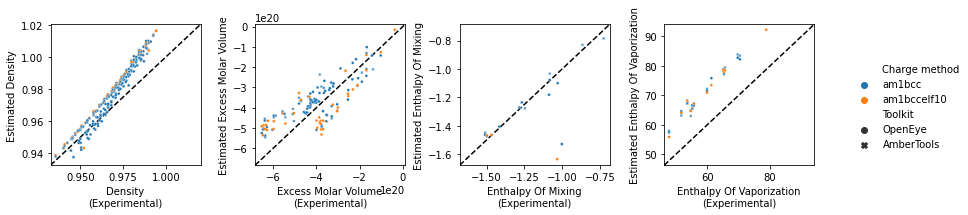

In [47]:
g = sns.FacetGrid(data=comb, col="Property", #col_wrap=2,
                  sharex=False, sharey=False, height=3, aspect=1,
                  despine=False, margin_titles=True)

g.map_dataframe(sns.scatterplot, "Experimental value", "Value",
                hue="Charge method", style="Toolkit", s=8)
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    propname = ax.get_title()
    ax.set_xlabel(f"{propname}\n(Experimental)")
    ax.set_title("")
    ax.set_ylabel(f"Estimated {propname}")
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    limits = (min(xmin, ymin), max(xmax, ymax))
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, zorder=-10, ls="--", color="k")

plt.tight_layout()
g.add_legend()


g.savefig("estimated_vs_experimental2.png", dpi=300)

#### OpenEye charge methods

In [19]:
oecomb = comb[comb.Toolkit == "OpenEye"]
oecomb

,Id,Property,Value,Unit,Uncertainty,Phase,Toolkit,Charge method,Experimental value,Experimental uncertainty,Source
0,dc0815534a3b40a7ae800e36ebb9cb95,Density,9.582299e-01,g / ml,2.381608e-04,Liquid,OpenEye,am1bcc,9.572640e-01,1.205000e-04,10.1016/j.jct.2010.12.028
1,0c2a94c7b31a40bb91afe7f757511bc1,Density,9.852282e-01,g / ml,3.843268e-04,Liquid,OpenEye,am1bcc,9.769310e-01,1.185000e-04,10.1016/j.jct.2010.12.028
2,fe28a3ead9be439493c6d51b967f53a9,Density,9.784435e-01,g / ml,2.778429e-04,Liquid,OpenEye,am1bcc,9.696110e-01,1.190000e-04,10.1016/j.jct.2010.12.028
3,e718135aa50e43f6907ccf7ce0389915,Density,9.868222e-01,g / ml,2.726124e-04,Liquid,OpenEye,am1bcc,9.748990e-01,2.315000e-04,10.1016/j.jct.2010.12.028
4,cfa01d22de3046eca222128bd4afa258,Excess Molar Volume,-3.220743e+20,nm ** 3 / mol,1.831265e+19,Liquid,OpenEye,am1bcc,-4.159000e+20,4.350000e+18,10.1016/j.jct.2010.12.028
...,...,...,...,...,...,...,...,...,...,...,...
93,637bcba9d79c48c89062a00a681eff61,Density,1.003873e+00,g / ml,3.309678e-04,Liquid,OpenEye,am1bccelf10,9.856110e-01,1.425000e-04,10.1016/j.jct.2010.12.028
94,47c9a63620764def8aad33fb7b895dc2,Excess Molar Volume,-4.265198e+20,nm ** 3 / mol,1.982599e+19,Liquid,OpenEye,am1bccelf10,-5.563000e+20,4.550000e+18,10.1016/j.jct.2010.12.028
95,e691e70d8c244ff8b1e218fa95499ba6,Excess Molar Volume,-4.989303e+20,nm ** 3 / mol,1.893274e+19,Liquid,OpenEye,am1bccelf10,-3.961000e+20,4.350000e+18,10.1016/j.jct.2010.12.028
96,9cd7607d64414cb8a73eb48dd4c132c8,Enthalpy Of Vaporization,7.090811e+01,kJ / mol,4.177324e-01,Liquid + Gas,OpenEye,am1bccelf10,5.990000e+01,1.850000e+00,10.1016/j.jct.2015.02.015


In [20]:
overlap = [i for i in oecomb.Id if len(oecomb[oecomb.Id == i]["Charge method"].unique()) == 2]
overlapping = oecomb[oecomb.Id.isin(overlap)]
# overlapping
wide = overlapping.pivot(index=["Id", "Property"], columns=["Charge method"], values="Value").reset_index()
import numpy as np
wide["Difference"] = np.abs(wide.am1bccelf10 - wide.am1bcc)
wide

Charge method,Id,Property,am1bcc,am1bccelf10,Difference
0,004895daae5a45c9be449e55777eb57d,Excess Molar Volume,-5.254227e+20,-4.914140e+20,3.400868e+19
1,024fb9da59b646908db1eaca24741113,Density,9.926816e-01,9.922236e-01,4.579635e-04
2,0356f3ed0e364949ab460f780f5054ff,Excess Molar Volume,-2.917972e+20,-2.884572e+20,3.339976e+18
3,04f514ff3394459d8249a01e765308ca,Density,9.887423e-01,9.886020e-01,1.402781e-04
4,0707facbe1f341688987206cf29601cc,Density,9.808688e-01,9.792907e-01,1.578073e-03
...,...,...,...,...,...
67,d50bda070748490caaea9c5048ba112f,Enthalpy Of Vaporization,6.717721e+01,6.713150e+01,4.571125e-02
68,d72f100eaece4e2b8f725afd4ef11deb,Enthalpy Of Vaporization,6.661417e+01,6.556617e+01,1.048001e+00
69,d750b34641494062bb7a67d19cd66766,Density,9.977177e-01,9.968231e-01,8.946239e-04
70,ec2c88d37d2f4ac5b7ee4e51b96fcdfe,Density,9.492207e-01,9.491806e-01,4.013923e-05


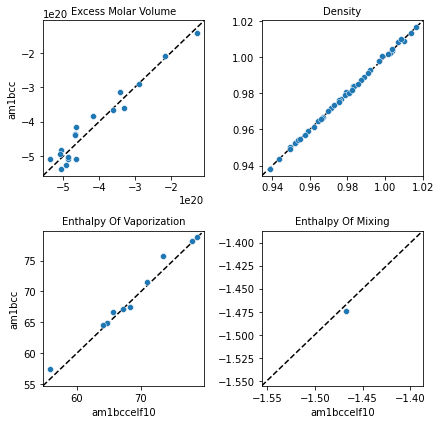

In [21]:
g = sns.FacetGrid(data=wide, col="Property", col_wrap=2,
                  sharex=False, sharey=False, height=3, aspect=1,
                  despine=False, margin_titles=True)

g.map_dataframe(sns.scatterplot, "am1bccelf10", "am1bcc")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    limits = (min(xmin, ymin), max(xmax, ymax))
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, zorder=-10, ls="--", color="k")

plt.tight_layout()
g.add_legend()
g.savefig("oe_charge_method.png", dpi=300)

/Users/lily/anaconda3/envs/polymetrizer/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


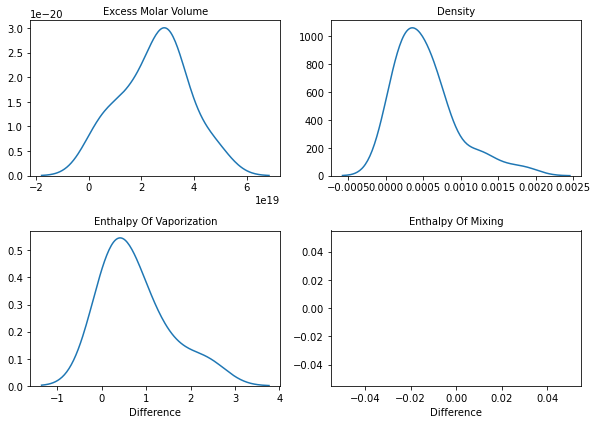

In [22]:
g = sns.FacetGrid(data=wide, col="Property", col_wrap=2,
                  sharex=False, sharey=False, height=3, aspect=1.4,
                  despine=False, margin_titles=True)

g.map_dataframe(sns.kdeplot, "Difference")
g.set_titles(col_template="{col_name}")
g.savefig("oe_charge_method_difference.png", dpi=300)

## RESP2

> The program ForceBalance41 was used to optimize the LJ parameters for RESP1 charges and for RESP2 with values of δ from 0 to 1 in steps of 0.05. To simplify and speed the optimizations, we limited the number of different LJ types to five: C, N, and O, polar H, and apolar H. Polar hydrogens were defined by the following extended SMARTS pattern:[#1:1]-[#7,#8].Because each LJ type has two parameters, $r_{min-half}$ and $\epsilon$, the optimizations were done in a ten-dimensional parameter space. Starting parameters were drawn from SMIRNOFF v1.0.7 (Supplementary Notes 1). Training was based on measured HOV and pure liquid densities of 15 molecules (Fig. 8a) with a variety of functional groups. The ForceBalance procedure was terminated when the step size for the mathematical parameters fell <0.01 or the objective function changed <1.0 between two iterations; further details are provided below in this section. The resulting parameters were tested against measured HOVs and densities for a separate set of 53 molecules (Fig. 8b), as well as the measured dielectric constants and HFE of a subset of these compounds. All experimental values for HOV were taken from ThermoML76. Densities were taken from ThermoML when available, and otherwise from PubChem77. Dielectric constants were taken from multiple sources78. HFE were taken from the FreeSolv database79. All values are summarized in Supplementary Tables 2 and 3.